In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import surp
import arya

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [45]:
from surp import gce_math as gcem

# Comparing observations
Here, we compare observations from a variety of sources similar to the subgiant sample.
We store each sample as a CSV (processed from the )

In [2]:
subgiants = surp.subgiants
v21 = surp.vincenzo2021()

In [8]:
apogee = pd.read_csv("../../data/apogee_most.csv")

In [4]:
v21["APOGEE_ID"] = [f"b'{i}'" for i in v21.apogee_id]

In [5]:
gso = pd.read_csv("gso_dwarfs.csv")

In [6]:
galah = pd.read_csv("galah_dwarfs.csv")

In [10]:
#lamost = pd.read_csv("lamost_dwarfs.csv")

In [14]:
v21.to_csv("v21.csv")

In [52]:
def c_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 2.5), gridspec_kw={"wspace": 0})
    
    plt.sca(axs[0])
    plt.scatter(df.MG_H, df.C_MG, c=np.array(arya.COLORS)[np.int64(gcem.is_high_alpha(df.MG_FE, df.FE_H))], **kwargs)
    plt.ylabel("[C/Mg]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.scatter(df.MG_FE, df.C_MG, c=df.MG_H, **kwargs)
    plt.xlabel("[Mg/Fe]")

In [50]:
def fe_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    
    plt.sca(axs[0])
    plt.hist2d(df.MG_H, df.MG_FE, **kwargs)
    plt.ylabel("[Mg/Fe]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.hist(df.FE_H)
    plt.xlabel("[Fe/H]")

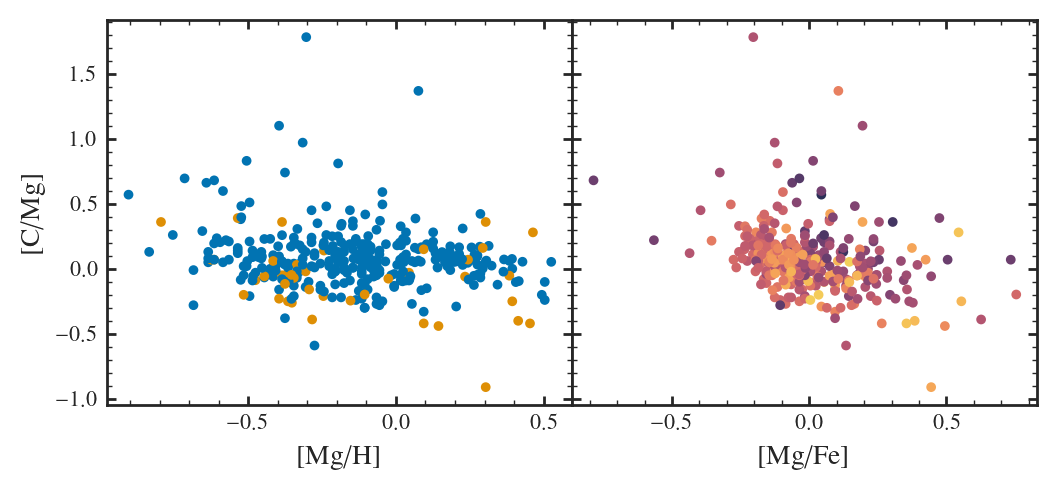

In [53]:
c_scatter(gso)

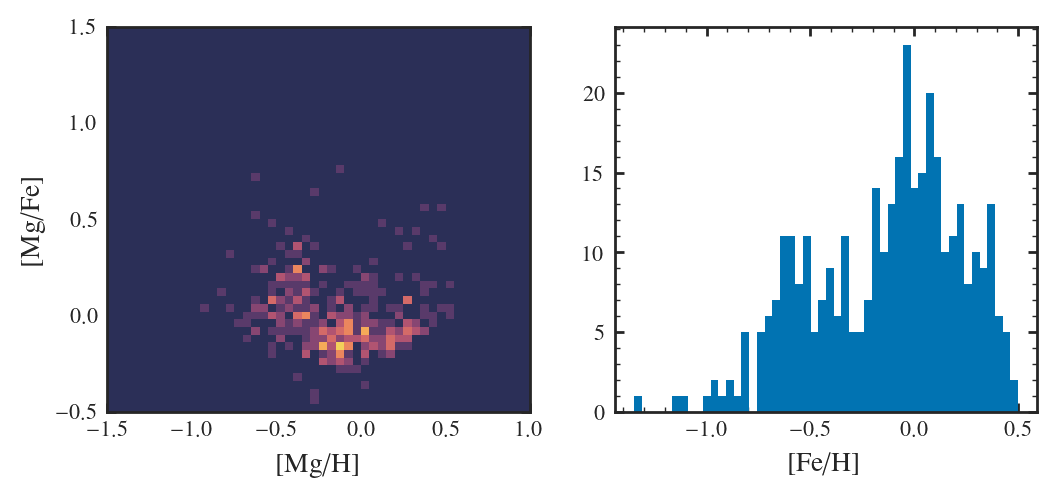

In [54]:
fe_scatter(gso, range=([-1.5, 1], [-0.5, 1.5]), bins=50)

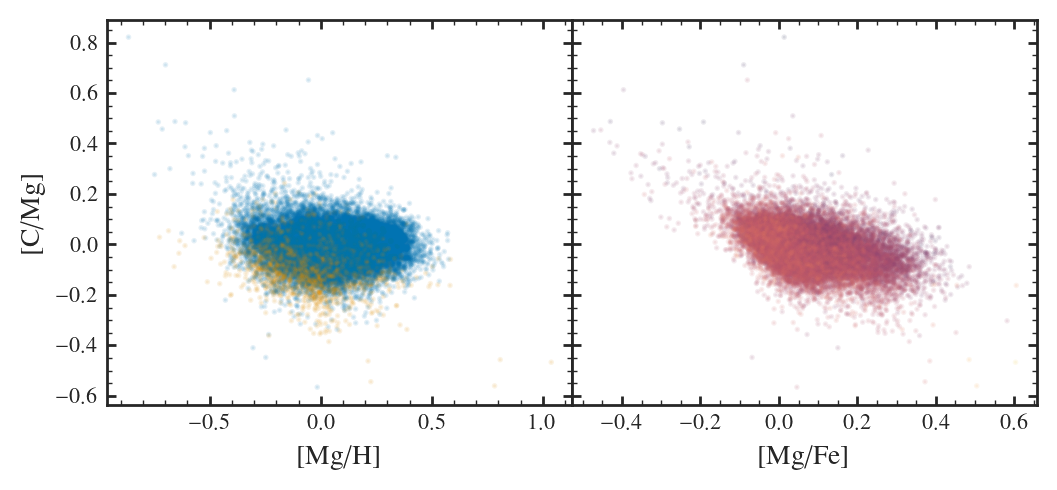

In [55]:
c_scatter(galah, alpha=0.1, s=1)

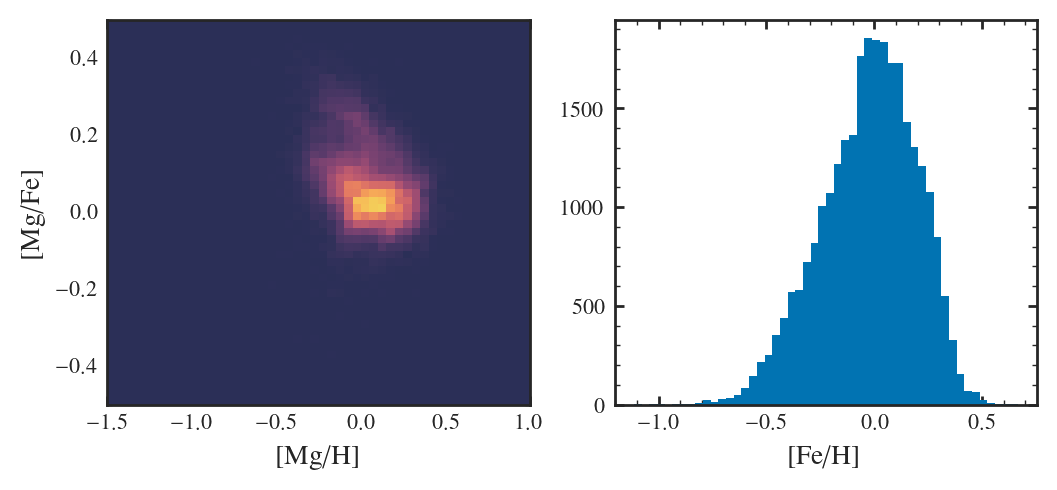

In [56]:
fe_scatter(galah, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

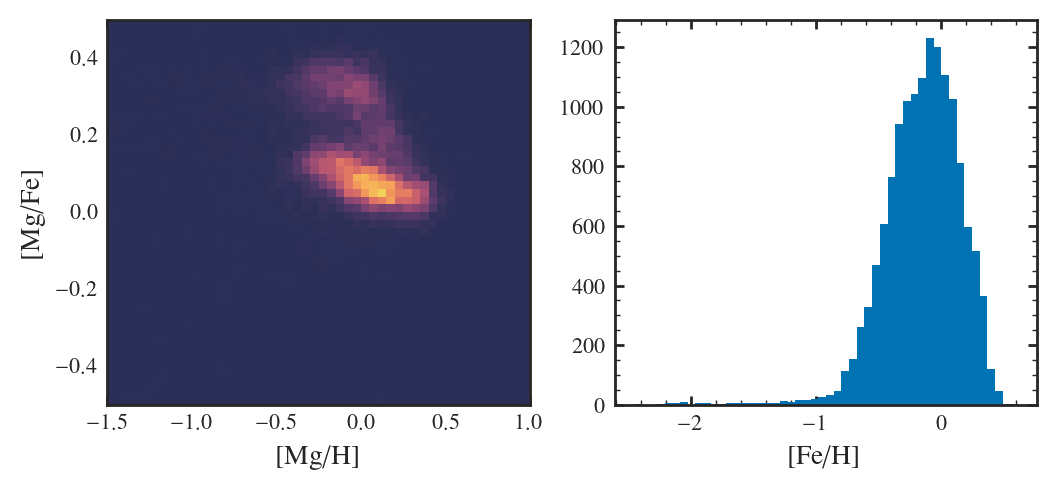

In [57]:
fe_scatter(subgiants, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

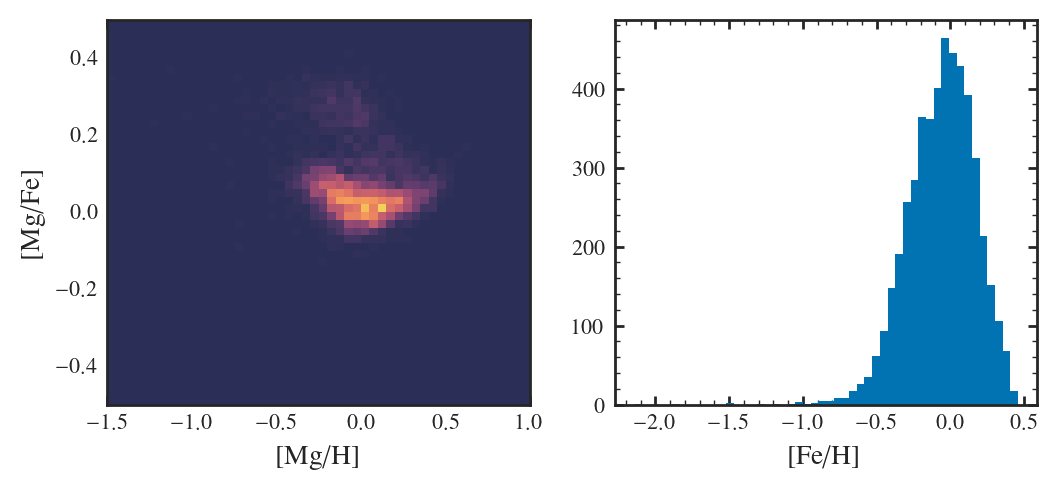

In [58]:
fe_scatter(v21, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

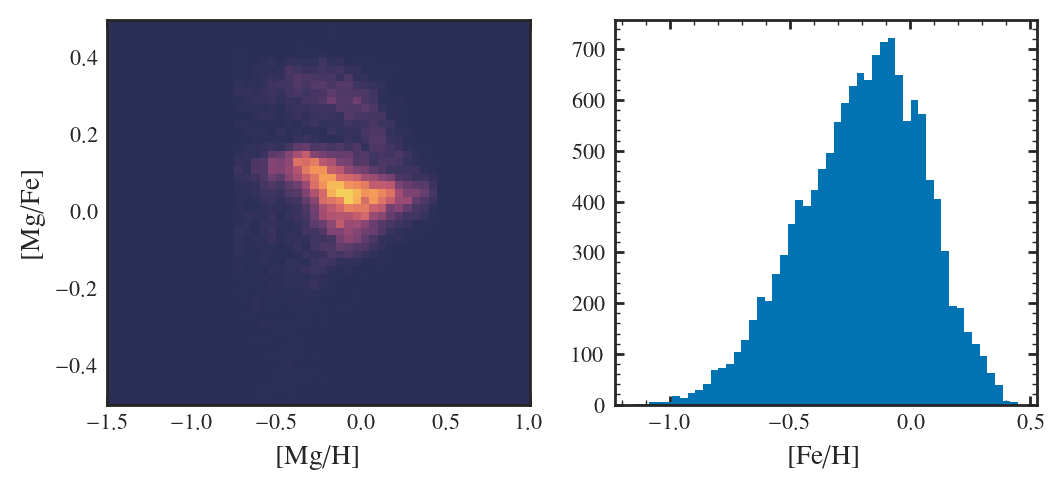

In [59]:
fe_scatter(apogee, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

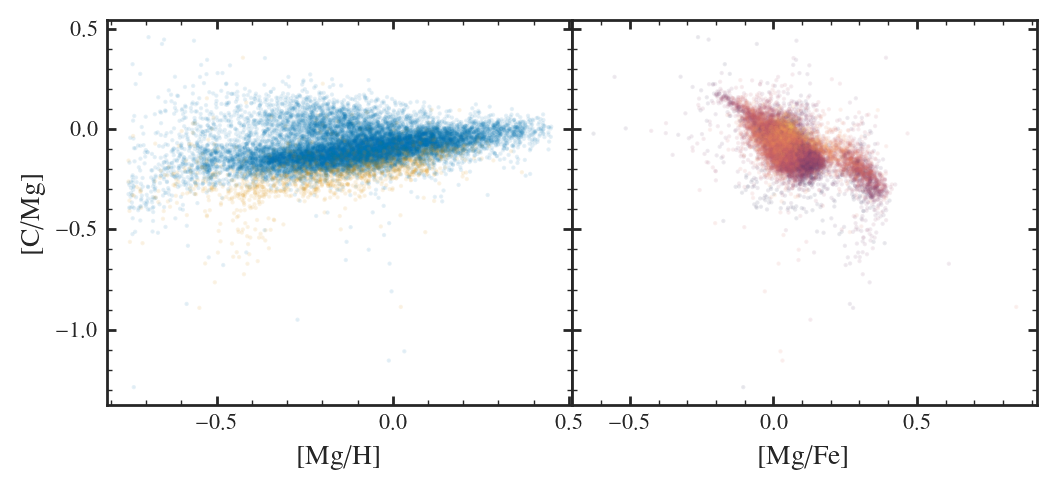

In [60]:
c_scatter(apogee, s=0.3, alpha=0.1)

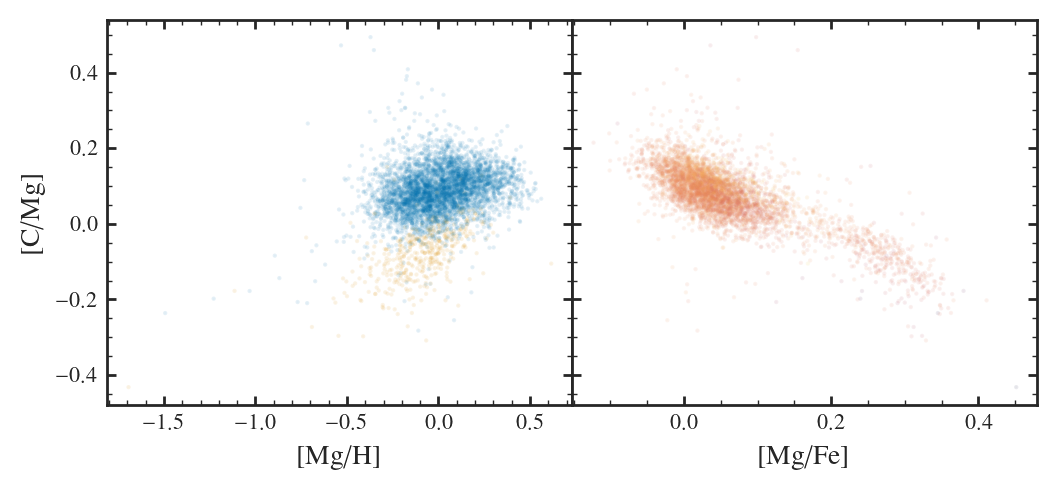

In [61]:
c_scatter(v21, s=0.3, alpha=0.1)

In [23]:
c_scatter(lamost)

NameError: name 'lamost' is not defined

In [24]:
gso = gso[np.isfinite(gso.C_MG)]

In [25]:
galah["high_alpha"] = surp.gce_math.is_high_alpha(galah.MG_FE, galah.FE_H)
gso["high_alpha"] = surp.gce_math.is_high_alpha(gso.MG_FE, gso.FE_H)
lamost["high_alpha"] = surp.gce_math.is_high_alpha(lamost.MG_FE, lamost.FE_H)

NameError: name 'lamost' is not defined

In [26]:
gso.plot_kwargs = dict(
    label = r"{\it Gaia}--ESO",
    aes="line",
    ms=5,
    binsize=70,
    color = arya.COLORS[3],
    marker = "*"
)

/tmp/ipykernel_3694213/222501310.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gso.plot_kwargs = dict(


In [65]:
galah.plot_kwargs = dict(
    label = "GALAH",
    aes = "line",
    binsize=2000, 
    color=arya.COLORS[2], ms=2,
    marker="o",
)

In [28]:
lamost.plot_kwargs = dict(
    label = "LAMOST",
    aes = "scatter",
    binsize=2000,
    color=arya.COLORS[4], 
    s=2 , 
    marker="^"
)

NameError: name 'lamost' is not defined

In [29]:
subgiants.plot_kwargs = dict(
    binsize=300, 
    label="subgiants",
    color=arya.COLORS[0], 
    aes="line"
)

/tmp/ipykernel_3694213/4132922423.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subgiants.plot_kwargs = dict(


In [30]:
v21.plot_kwargs = dict(
    binsize=300, 
    label="V21",
    color=arya.COLORS[1], 
    aes="line", 
    marker="s"
)

/tmp/ipykernel_3694213/1407533816.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  v21.plot_kwargs = dict(


In [31]:
surveys = [subgiants, v21, galah,  gso] # lamost

In [32]:
def plot_caah_survey(df):
    arya.medianplot(df[~df.high_alpha], "MG_H", "C_MG",errorbar=None, **df.plot_kwargs)
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")

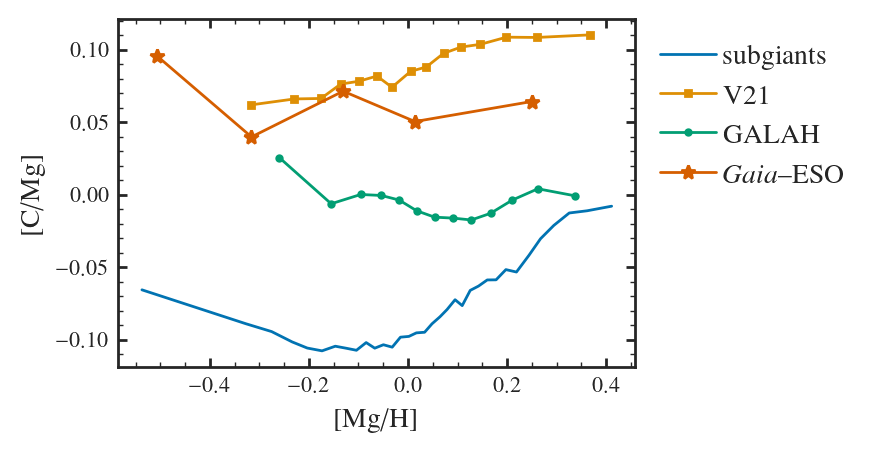

In [66]:
for survey in surveys:
    plot_caah_survey(survey)
    
arya.Legend(-1)

In [67]:
def plot_caafe_survey(df):
    arya.medianplot(df, "MG_FE", "C_MG", errorbar=None, **df.plot_kwargs)

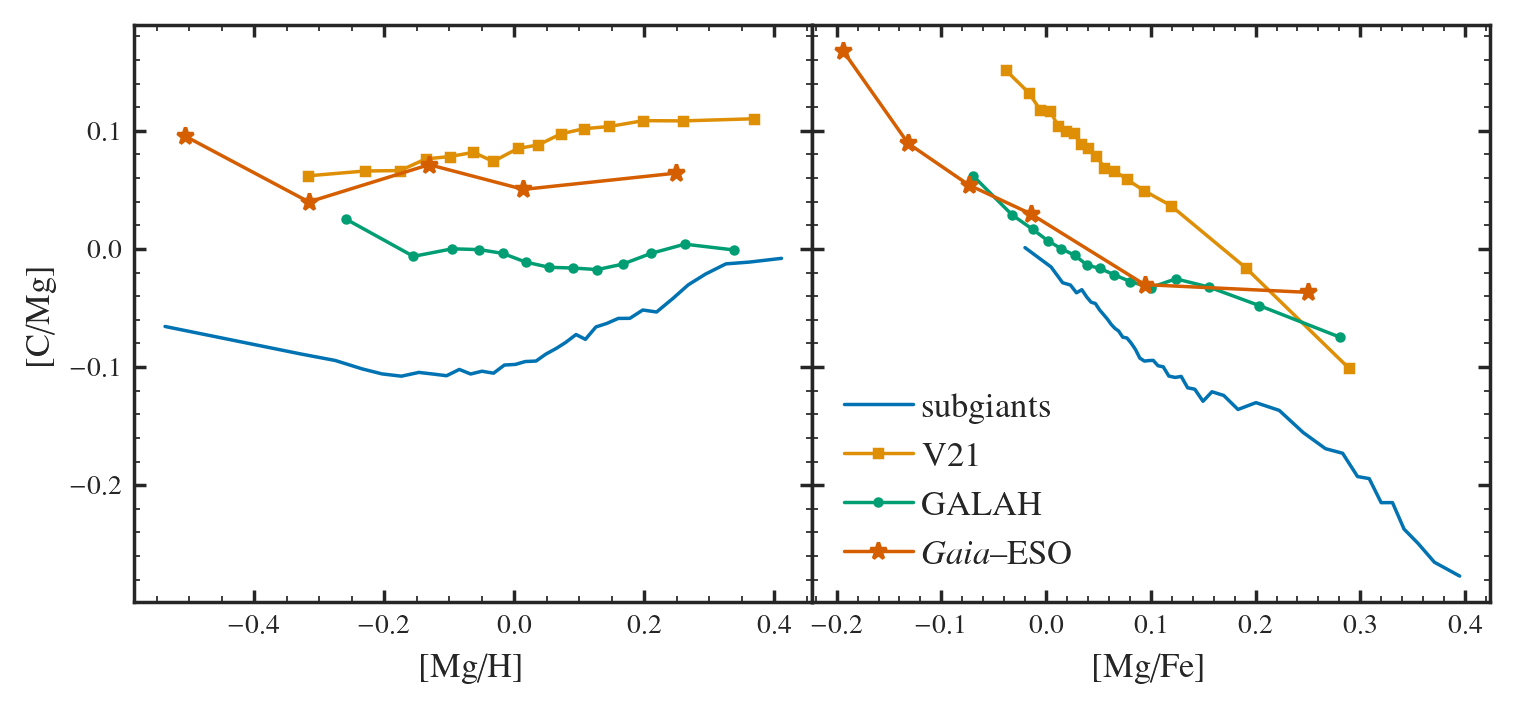

In [68]:

fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=True, gridspec_kw={"wspace": 0}, dpi=250)


plt.sca(axs[0])

for survey in surveys:
    plot_caah_survey(survey)
    


plt.sca(axs[1])
for survey in surveys:
    plot_caafe_survey(survey)
    
plt.legend(ncols=1, loc=3)

plt.xlabel("[Mg/Fe]")
plt.savefig("cmg_other_surveys.pdf")


# XMatch

In [ ]:
def plot_xmatch_all(xmatch, survey1, survey2):
    plt.scatter(xmatch.FE_H, xmatch.FE_H_2 - xmatch.FE_H, s=1, alpha=0.3)
    plt.xlabel("FE_H")
    plt.ylabel(f"FE H {survey1} - FEH {survey2}")
    plt.axhline(0, color="k")
    plt.show()

    plt.xlabel("MG_H")
    plt.ylabel(f"MG_H  {survey1} - {survey2}")

    plt.scatter(xmatch.MG_H, xmatch.MG_H_2 - xmatch.MG_H, s=1, alpha=0.3)
    plt.axhline(0, color="k")

    plt.show()

    plt.xlabel("MG_FE")
    plt.ylabel(f"MG_FE  {survey1} - {survey2}")

    plt.scatter(xmatch.MG_FE, xmatch.MG_FE_2 - xmatch.MG_FE, s=1, alpha=0.3)
    plt.axhline(0, color="k")

    plt.show()


    
    plt.xlabel("C_MG")
    plt.ylabel(f"C_MG  {survey1} - {survey2}")

    plt.scatter(xmatch.C_MG, xmatch.C_MG_2 - xmatch.C_MG, s=1, alpha=0.3)
    plt.axhline(0, color="k")

    plt.show()

    
    plt.xlabel("TEFF")
    plt.ylabel(f"TEFF  {survey1} - {survey2}")

    plt.scatter(xmatch.TEFF, xmatch.TEFF_2 - xmatch.TEFF, s=1, alpha=0.3)
    plt.axhline(0, color="k")

    plt.show()

    
    plt.xlabel("LOGG")
    plt.ylabel(f"LOGG  {survey1} - {survey2}")

    plt.scatter(xmatch.LOGG, xmatch.LOGG_2 - xmatch.LOGG, s=1, alpha=0.3)
    plt.axhline(0, color="k")

    plt.show()
    

In [ ]:
xmatched = subgiants.join(galah.set_index("gaiadr3_source_id"), how="inner", on="GAIAEDR3_SOURCE_ID", rsuffix="_2")

In [ ]:
plot_xmatch_all(xmatched, "apogee", "galah")

### GSO does not match :/

In [ ]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [ ]:
def get_crossmatch(ra1, dec1, ra2, dec2, max_sep=1*u.arcsec):
    ra1 = np.array(ra1)
    dec1 = np.array(dec1)
    ra2 = np.array(ra2)
    dec2 = np.array(dec2)
    
    # Convert catalogue positions into SkyCoord objects
    coords1 = SkyCoord(ra=ra1 * u.degree, dec=dec1 * u.degree)
    coords2 = SkyCoord(ra=ra2 * u.degree, dec=dec2 * u.degree)

    # Perform crossmatch
    idx, d2d, d3d = coords1.match_to_catalog_sky(coords2)

    sep_constraint = d2d < max_sep

    # Filter matches
    matches = idx[sep_constraint]
    matched_d2d = d2d[sep_constraint]


    idx_l = np.where(sep_constraint)[0] #df indicies
    idx_r = matches # apogee indicies

    print(len(ra1))
    print(len(ra2))
    print("num matches", len(idx_l))
    
    plt.scatter(ra2, dec2,  s=0.01, alpha=1, label="2")

    plt.scatter(ra1, dec1,  s=0.01, alpha=1, label="1")
    plt.xlabel("RA")
    plt.ylabel("DEC")
    plt.show()
    
    plt.scatter(ra2[idx_r], dec2[idx_r], 
                s=0.01, alpha=1, label="match")
    plt.scatter(ra1[idx_l], dec1[idx_l],
                s=0.01, alpha=1, label="match")
    plt.xlabel("RA")
    plt.ylabel("DEC")
    
    return idx_l, idx_r

In [ ]:
get_crossmatch(gso.RA, gso.DECLINATION, subgiants.RA, subgiants.DEC)

In [ ]:
get_crossmatch(gso.RA, gso.DECLINATION, galah.ra, galah.dec)

### Lamost does not xmatch

In [ ]:
lamost.columns.values

In [ ]:
xmatched = subgiants.join(lamost.set_index("GAIA_SOURCE_ID"), how="inner", on="GAIAEDR3_SOURCE_ID", rsuffix="_2")

In [ ]:
xmatched

In [ ]:
xmatched = galah.join(lamost.set_index("GAIA_SOURCE_ID"), how="inner", on="gaiadr3_source_id", rsuffix="_2")
xmatched

In [ ]:
xmatched.ra, xmatched.dec

In [ ]:
xmatched.RA, xmatched.DEC